This plots (I) relevant mathematical functions that determine the effective pressure in Fourier space and (II) a semi-analytical example of effective pressure $N$ for a basal vertical velocity $w_\mathrm{b}$ with sinusoidal oscillations in time

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../source')

import matplotlib.pyplot as plt
import numpy as np
from kernel_fcns import C_h,C_w, Rg,Tw
from scipy.special import jv

In [2]:
delta = 1000.0/917.0-1
k = np.linspace(1e-2,1e1,1000)
beta0 = 1e-2

Ch_1 = C_h(beta0,k/(2*np.pi))
Cw_1 = C_w(beta0,k/(2*np.pi))
R_1 = Rg(beta0,k/(2*np.pi))
T_1 = Tw(beta0,k/(2*np.pi))

Ch_2 = C_h(1e1*beta0,k/(2*np.pi))
Cw_2 = C_w(1e1*beta0,k/(2*np.pi))
R_2 = Rg(1e1*beta0,k/(2*np.pi))
T_2 = Tw(1e1*beta0,k/(2*np.pi))

Ch_3 = C_h(1e2*beta0,k/(2*np.pi))
Cw_3 = C_w(1e2*beta0,k/(2*np.pi))
R_3 = Rg(1e2*beta0,k/(2*np.pi))
T_3 = Tw(1e2*beta0,k/(2*np.pi))

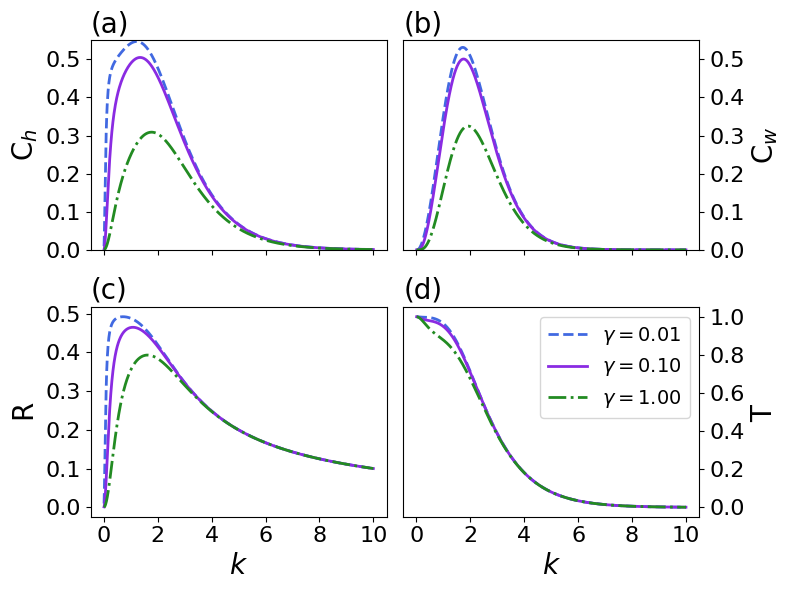

In [3]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.title(r'(a)',fontsize=20,loc='left')
plt.plot(k,Ch_1,color='royalblue',linewidth=2,linestyle='--')
plt.plot(k,Ch_2,color='blueviolet',linewidth=2,linestyle='-')
plt.plot(k,Ch_3,color='forestgreen',linewidth=2,linestyle='-.')
plt.yticks(fontsize=16)
plt.gca().xaxis.set_ticklabels([])
plt.ylabel(r'$\mathsf{C}_h$',fontsize=20)
plt.ylim(0,0.55)

plt.subplot(222)
plt.title(r'(b)',fontsize=20,loc='left')
plt.plot(k,Cw_1,color='royalblue',linewidth=2,label=r'$\gamma=1$',linestyle='--')
plt.plot(k,Cw_2,color='blueviolet',linewidth=2,label=r'$\gamma=10$',linestyle='-')
plt.plot(k,Cw_3,color='forestgreen',linewidth=2,linestyle='-.',label=r'$\gamma=100$')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel(r'$\mathsf{C}_w$',fontsize=20)
plt.gca().xaxis.set_ticklabels([])
plt.ylim(0,0.55)


plt.subplot(223)
plt.title(r'(c)',fontsize=20,loc='left')
plt.plot(k,R_1,color='royalblue',linewidth=2,label=r'$\gamma=10^{-2}$',linestyle='--')
plt.plot(k,R_2,color='blueviolet',linewidth=2,label=r'$\gamma=10^{-1}$',linestyle='-')
plt.plot(k,R_3,color='forestgreen',linewidth=2,linestyle='-.',label=r'$\gamma=1$')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel(r'$\mathsf{R}$',fontsize=20)
plt.xlabel(r'$k$',fontsize=20)


plt.subplot(224)
plt.title(r'(d)',fontsize=20,loc='left')
plt.plot(k,T_1,color='royalblue',linewidth=2,label=r'$\gamma=0.01$',linestyle='--')
plt.plot(k,T_2,color='blueviolet',linewidth=2,label=r'$\gamma=0.10$',linestyle='-')
plt.plot(k,T_3,color='forestgreen',linewidth=2,linestyle='-.',label=r'$\gamma=1.00$')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel(r'$k$',fontsize=20)
plt.ylabel(r'$\mathsf{T}$',fontsize=20)
plt.legend(fontsize=14,loc='upper right')
plt.tight_layout()
plt.savefig('fig3')
plt.show()
plt.close()

In [4]:
def Ec(k,omega,lamda,beta0):
    Ch_ = C_h(beta0,k/(2*np.pi))
    Cw_ = C_w(beta0,k/(2*np.pi))
    R_ = Rg(beta0,k/(2*np.pi))
    T_ = Tw(beta0,k/(2*np.pi))
    return (1/lamda)*Cw_ - lamda*R_*Ch_*T_/(omega**2 + (lamda*R_)**2)

def Es(k,omega,lamda,beta0):
    Ch_ = C_h(beta0,k/(2*np.pi))
    Cw_ = C_w(beta0,k/(2*np.pi))
    R_ = Rg(beta0,k/(2*np.pi))
    T_ = Tw(beta0,k/(2*np.pi))
    return omega*Ch_*T_/(omega**2 + (lamda*R_)**2)

In [5]:
# set some example parameters and compute components of sinusoidal oscillations
beta0 = 1
lamda = 0.5
Es_0 = Es(k,0.5,lamda,beta0)
Ec_0 = Ec(k,0.5,lamda,beta0)

Es_1 = Es(k,1,lamda,beta0)
Ec_1 = Ec(k,1,lamda,beta0)

Es_2 = Es(k,2,lamda,beta0)
Ec_2 = Ec(k,2,lamda,beta0)
H = 2000
sigma = (10*1000.0/H)/3.0

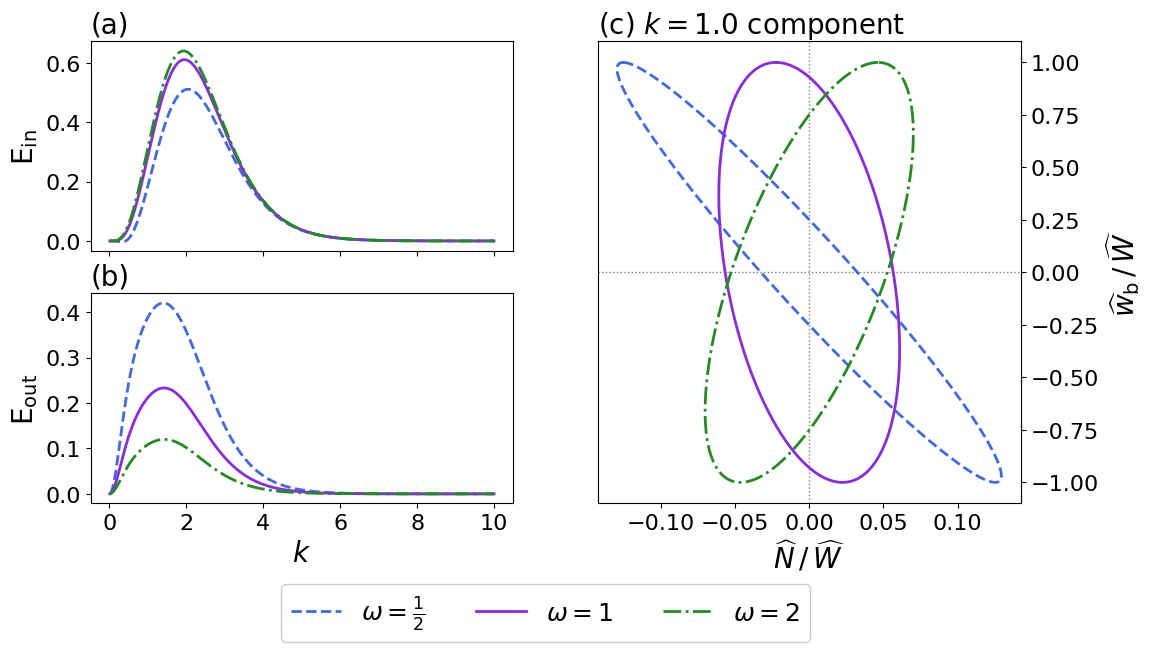

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(223)
plt.title(r'(b)',fontsize=20,loc='left')
plt.plot(k,Es_0,color='royalblue',linewidth=2,linestyle='--')
plt.plot(k,Es_1,color='blueviolet',linewidth=2,linestyle='-')
plt.plot(k,Es_2,color='forestgreen',linewidth=2,linestyle='-.')
# plt.gca().yaxis.tick_right()
# plt.gca().yaxis.set_label_position("right")
plt.xticks(fontsize=16)
plt.ylabel(r'$\mathsf{E}_\mathrm{out}$',fontsize=20)
plt.xlabel(r'$k$',fontsize=20)
# plt.yticks([0.0,0.1,0.2],fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(221)
plt.title(r'(a)',fontsize=20,loc='left')
plt.plot(k,Ec_0,color='royalblue',linewidth=2,linestyle='--',label=r'$\omega=\frac{1}{2}$')
plt.plot(k,Ec_1,color='blueviolet',linewidth=2,linestyle='-',label=r'$\omega=1$')
plt.plot(k,Ec_2,color='forestgreen',linewidth=2,linestyle='-.',label=r'$\omega=2$')
# plt.yticks([-0.1,0.0,0.1,0.2],fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel(r'$\mathsf{E}_\mathrm{in}$',fontsize=20)
# plt.xlabel(r'$k$',fontsize=20)
plt.gca().xaxis.set_ticklabels([])

plt.subplot(122)
k_ex = 1
W0 = np.sqrt(np.pi)*sigma
W1 = np.sqrt(np.pi)*sigma * np.exp(-(sigma**2)*(k_ex**2)/4.)
dW = W0/W1
# print(dW) # check this value

plt.title(r'(c)'+r' $k=$'+'{:.1f}'.format(k_ex)+' component',fontsize=20,loc='left')
linestyles = ['--','-','-.']
colors = ['royalblue','blueviolet','forestgreen']
labels= [r'$\omega=\frac{1}{2}$',r'$\omega=1$',r'$\omega=2$']
plt.axvline(x=0,color='k',linestyle=':',linewidth=1,alpha=0.5)
plt.axhline(y=0,color='k',linestyle=':',linewidth=1,alpha=0.5)
j=0
for omega in [0.5,1,2]:
    t = np.linspace(0,2*np.pi/omega,2000)
    C = np.cos(omega*t) 
    Es_ = Es(k,omega,2,beta0)
    Ec_ = Ec(k,omega,2,beta0)
    ell = 10
    mean = dW*jv(1,k*ell)*(2*delta/omega)/(k*ell)
    l0 = np.argmin(np.abs(k-k_ex))

    for l in [l0]:
        E = np.sin(omega*t) * (delta/omega-Es_[l]-mean[l]) +  np.cos(omega*t) * Ec_[l]
        plt.plot(E.flatten(),C.flatten(),linestyle=linestyles[j],color=colors[j],linewidth=2,label=labels[j])
    j+=1
# plt.annotate(xy=(-0.297,0.94),text=r'$k=$'+'{:.1f}'.format(k_ex),fontsize=20, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))
# plt.xlim(-0.1,0.1)
plt.legend(fontsize=18,loc=(-0.75,-0.3),framealpha=1,ncol=3)
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.yticks(fontsize=16)
plt.ylabel(r'$\widehat{w}_\mathrm{b}\,/\,\widehat{W}$',fontsize=20)
plt.xlabel(r'$\widehat{N}\,/\,\widehat{W}$',fontsize=20)
# plt.xticks([-0.1,-0.05,0.0,0.05,0.1],fontsize=16)
plt.xticks(fontsize=16)
plt.savefig('fig4',bbox_inches='tight')
plt.show()
plt.close()